## Bresenham 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

Your task is to implement the bresenham function given two points $p_1$ and $p_2$ as inputs. The function should return the list of grid cells required to draw the line.

What conditions would warrant a move by 1 unit along the x-axis? What about along the y-axis?

The idea is to move based on whether the next $y$ value will be above or below the line from $p_1$ to $p_2$. We can keep track of the current line value, effectively $f(x)$ where $f$ is the line equation by incrementing a counter variable by the slope $m$ whenever we move in the x-axis.

The condition is then (in pseudocode):

```
if f(x+1) > y + 1:
    y += 1
else:
    x += 1
```

So, if moving along the y-axis results in a y value that is below the line, then move along the y-axis, otherwise,  move in the x-axis.

In [61]:
def bres(p1, p2): 
    """
    Note this solution requires `x1` < `x2` and `y1` < `y2`.
    """
    x1, y1 = p1
    x2, y2 = p2
    x_sign = 1 if x2 >= x1 else -1
    y_sign = 1 if y2 >= y1 else -1
    print(x_sign, y_sign)
    
    x1 *= x_sign
    x2 *= x_sign
    y1 *= y_sign
    y2 *= y_sign
    
    cells = []
    
    if x2 - x1 == 0:
        for y in range(y1, y2 + 1):
            cells.append((x1 * x_sign, y * y_sign))
        return np.array(cells)
        
    x = x1
    y = y1
    f = y1
    m = (y2 - y1) / (x2 - x1)
    # Determine valid grid cells
    while x < x2:
        cells.append((x * x_sign, y * y_sign))
        if f + m > y + 1:
            y += 1
        else:
            x += 1
            f += m
    return np.array(cells)

In [62]:
def bres_sol(p1, p2): 
    """
    Note this solution requires `x1` < `x2` and `y1` < `y2`.
    """
    x1, y1 = p1
    x2, y2 = p2
    cells = []
    
    m = (y2 - y1) / (x2 - x1)
    
    line_val = y1
    i = x1
    j = y1
    
    while i < x2:
        cells.append([i, j])
        if line_val + m > j + 1:
            j += 1
        else:
            line_val += m
            i += 1
        
    return np.array(cells)

In [63]:
import time
p1 = (0, 0)
p2 = (70000, 50000)

t1 = time.time()
cells = bres_sol(p1, p2)
t_sol = time.time() - t1

t1 = time.time()
cells = bres(p1, p2)
t_mine = time.time() - t1
print(t_sol/t_mine)

1 1
1.3354643831197395


Plotting the line with the cells which it crosses. 

1 1
[[7 0]
 [7 1]
 [7 2]
 [7 3]
 [7 4]
 [7 5]]


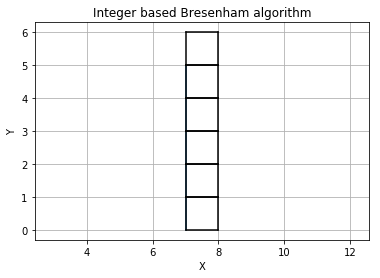

In [64]:
p1 = (7, 0)
p2 = (7, 5)

cells = bres(p1, p2)
print(cells)

plt.plot([p1[0], p2[0]], [p1[1], p2[1]])


for q in cells:
    plt.plot([q[0], q[0]+1], [q[1], q[1]], 'k')
    plt.plot([q[0], q[0]+1], [q[1]+1, q[1]+1], 'k')
    plt.plot([q[0], q[0]], [q[1],q[1]+1], 'k')
    plt.plot([q[0]+1, q[0]+1], [q[1], q[1]+1], 'k')

plt.grid()
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Integer based Bresenham algorithm")
plt.show()

Check out our solution [here](/notebooks/Bresenham-Solution.ipynb).

### Python Bresenham Package
For comparison let's have a look at the Python Bresenham package!

First we need to install it:

In [29]:
from bresenham import bresenham

Next we can run the same experiment as above and plot it up.

[(0, 0), (-1, 1), (-2, 1), (-3, 2), (-4, 3), (-5, 4), (-6, 4), (-7, 5)]


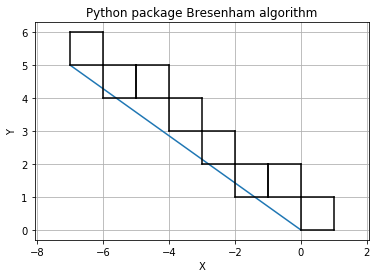

In [31]:
# Note: you can run this for any (x1, y1, x2, y2)
line = (0, 0, 7, 5)

cells = list(bresenham(line[0], line[1], line[2], line[3]))
print(cells)

plt.plot([line[0], line[2]], [line[1], line[3]])


for q in cells:
    plt.plot([q[0], q[0]+1], [q[1], q[1]], 'k')
    plt.plot([q[0], q[0]+1], [q[1]+1, q[1]+1], 'k')
    plt.plot([q[0], q[0]], [q[1],q[1]+1], 'k')
    plt.plot([q[0]+1, q[0]+1], [q[1], q[1]+1], 'k')

plt.grid()
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Python package Bresenham algorithm")
plt.show()